In [7]:
def load_model_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_sum.pt"))

def load_R2SP_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "R2SP_client_sum.pt"))

def load_server_to_client_sum(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "sever_to_client_sum.pt"))

def load_client_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_loss.pt"))

def load_client_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_client_acc.pt"))

def load_client_size(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "list_model_size.pt"))

def load_client_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_client_time.pt"))


def load_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.list_acc.pt"))

def load_time(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "self.time"))


def load_ms(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_size.pt"))

def load_fed_avg_acc(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_acc.pt"))

def load_fed_avg_loss(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "fed_avg_loss.pt"))

def load_model_G(exp, cs=False):
    return load(join(result_path, "{}{}".format(exp, "_cs" if cs else ""), "model_G.pt"))



%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# Create data
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from itertools import product
from utils.save_load import load



if os.getcwd().startswith('/mnt/sda1/mcj/PruneFL-master/PruneFL-master'):
    os.chdir('/mnt/sda1/mcj/PruneFL-master/PruneFL-master')

if os.getcwd().startswith("/data/mcj/Prune_fl"):
    os.chdir("/data/mcj/Prune_fl")

dataset_name = "CelebA"
import configs.celeba as config
client_sel = False
time_lim = (-1000, 60000)
acc_lim = (0.0, 0.9)
lottery_ticket_acc_lim = (0.7, 0.9)
n = 10

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")

AttributeError: module 'matplotlib' has no attribute 'get_cachedir'

In [5]:
all_words = ['社交媒体', '上', '的', '用户', '热议', '最新', '的', '电影', '上映', '。', '一位', '知名', '博主', '发布', '了', '一篇', '关于', '科技', '趋势', '的', '博客', '文章', '。', '某', '政治', '事件', '在', '社交', '网络', '上', '引发', '了', '激烈', '的', '讨论', '。', '一家', '公司', '发布', '了', '一份', '重要', '声明', '，', '引起', '了', '用户', '的', '关注', '。', '网民', '们', '分享', '了', '他们', '的', '健康', '和', '锻炼', '经验', '。']


In [1]:
!pip install WordCloud
from wordcloud import WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/b2/e9/0e717dbf8c31a4e9ead9fa48a4b691c48209f9cbb3d774caeca991d217eb/wordcloud-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.1/520.1 kB 752.1 kB/s eta 0:00:00a 0:00:01


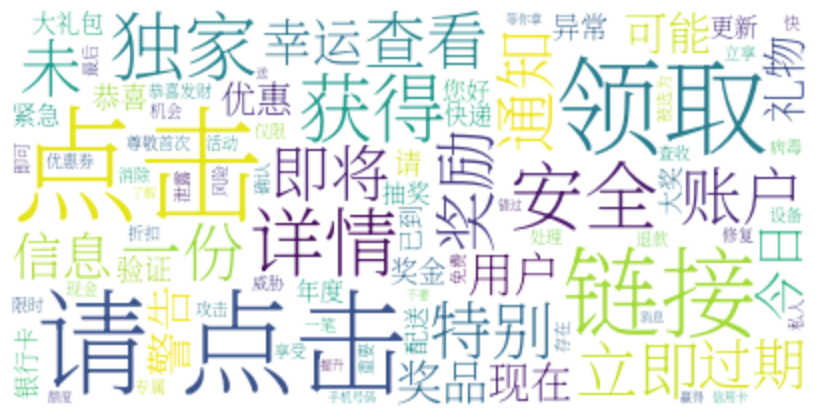

In [3]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 假设你有一些与网络舆情相关的文本数据，将其存储在一个字符串列表中
online_sentiment_data = [

    "恭喜您获得我们的特别奖励，请点击链接领取奖金！",
    "您的账户异常，为了安全，请立即点击此链接验证。",
    "特别通知：您有一份大礼包未领取，请点击此处查看详情！",
    "紧急：您的银行卡即将过期，请点击此链接更新信息。",
    "您好，您获得了我们的年度幸运抽奖，点击链接领取大奖。",
    "您的快递已到，请点击链接查看配送详情。",
    "恭喜发财，您被选为今日幸运用户，点击领取专属奖品。",
    "安全警告：您的设备可能受到病毒攻击，点击消除威胁。",
    "尊敬的用户，您有一份礼物待领取，请点击查收！",
    "最后机会！您的优惠券即将过期，现在点击立享优惠。",
    "独家优惠仅限今日，快来点击链接享受折扣。",
    "您有一笔未领取的退款，请点击此处处理。",
    "限时活动：首次点击即可获得现金奖励！",
    "警告：您的账户存在安全风险，立即点击修复。",
    "重要通知：您的私人信息可能已泄露，请点击确认。",
    "免费礼物等你拿！现在点击就送，不要错过！",
    "您的手机号码赢得了我们的独家奖品，请点击领取。",
    "独家消息：您的信用卡额度提升了，点击了解详情。",


]
# 将文本数据合并成一个字符串
online_sentiment_text = " ".join(online_sentiment_data)

# 使用jieba库进行中文分词，并加载停用词表
stopwords_path = 'cn_stopwords.txt'  # 停用词文件路径，每行一个停用词
stopwords = set()
with open(stopwords_path, 'r', encoding='utf-8') as f:
    for line in f:
        stopwords.add(line.strip())

online_sentiment_words = jieba.cut(online_sentiment_text)

# 去除停用词
filtered_words = [word for word in online_sentiment_words if word not in stopwords]

# 合并分词结果
all_words = filtered_words


# 创建词云对象
wordcloud = WordCloud(background_color="white",font_path='SourceHanSerifSC-VF.otf')
# 生成词云图
wordcloud.generate(" ".join(all_words))

# 显示词云图
plt.figure(figsize=(8, 8) , facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# 显示词云图
plt.show()


In [4]:
import os
os.listdir(result_path)

NameError: name 'result_path' is not defined

In [437]:
exp = [

    'PIF_CelebA_[1.0, 0.7, 5]1.0__asyn__recover_con_sub_fed_avg_0.2__n__100_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 5]0.5__con_sub_fed_avg_0.2___100_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 5]0.5__asyn__con_sub_fed_avg_0.2__n__100_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_sub_fed_avg_0.2__n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__con_sub_fed_avg_0.2__n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__asyn__con_sub_fed_avg_0.2__n__30_____ft_esc',

    
    'PIF_CelebA_[1.0, 0.5, 0.3]1.0__asyn__recover_con_sub_fed_avg_0.2__n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__con_sub_fed_avg_0.2__n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__asyn__con_sub_fed_avg_0.2__n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 1.0, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 1.4285714285714286, 2.0, 2.0, 2.0, 2.0]10__recover_con_sub_fed_avg__n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.5, 0.3]1.0__asyn__recover_con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__asyn__con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__asyn__con_sub_fed_avg_0.2_0.1_n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.5, 0.3]1.0__asyn__recover_con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__asyn__con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__asyn__con_sub_fed_avg_0.2_0.05_n__30_____ft_esc',
]

exp_legend = [

    
    '1__asyn',
    '5__asyn',
    '5__syn',
    
    '1__asyn',
    '0.5__asyn',
    '0.5__syn',
    
    '1__asyn',
    '0.3__asyn',
    '0.3__syn',
    
    'test',
    
    '1__asyn',
    '0.3__syn',
    '0.3__asyn',

    
    '1__asyn',
    '0.5__syn',
    '0.5__asyn',
    
    
        
    '1__asyn',
    '0.3__syn',
    '0.3__asyn',

    
    '1__asyn',
    '0.5__syn',
    '0.5__asyn',
   ]




#lr  -2 是增大学习率，大概是类似于增大本地跌打次数类似的效果


In [442]:
exp = [
  
    'PIF_CelebA_[1.0, 0.5, 0.3]1.0__asyn__recover_con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__asyn__con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',

    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__asyn__con_sub_fed_avg_0.2_0.01_n__30_____ft_esc',


    'PIF_CelebA_[1.0, 0.5, 0.3]1.0__asyn__recover_con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.5, 0.3]0.3__asyn__con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',
    
    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',
    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',

    'PIF_CelebA_[1.0, 0.7, 0.5]0.5__asyn__con_sub_fed_avg_0.2_0.005_n__30_____ft_esc',
]

exp_legend = [

    
    '1__asyn',
    '0.3__syn',
    '0.3__asyn',

    
    '1__asyn',
    '0.5__syn',
    '0.5__asyn',
    
    
    
    '1__asyn',
    '0.3__syn',
    '0.3__asyn',

    
    '1__asyn',
    '0.5__syn',
    '0.5__asyn',
    
   ]




#lr  -2 是增大学习率，大概是类似于增大本地跌打次数类似的效果


In [472]:
exp = [
    'PIF_CelebA_[1.0, 0.9, 0.8]1.0__recover_con_sub_fed_avg_0.2_0.001_n__10_0.1____ft_esc',
    'PIF_CelebA_[1.0, 0.9, 0.8]1.0__asyn__recover_con_fedasyn_0.2_0.001_n__10_0.1____ft_esc',
    'PIF_CelebA_[1.0, 0.9, 0.8]1.0__asyn__recover_con_sub_fed_avg_0.2_0.001_n__10_0.1____ft_esc',
    'PIF_CelebA_[1.0, 0.9, 0.8]0.1__asyn__recover_con_sub_fed_avg_0.2_0.001_n__10_0.1____ft_esc',
    'PIF_CelebA_[1.0, 0.9, 0.8]0.1__asyn__con_sub_fed_avg_0.2_0.001_n__10_0.1____ft_esc',


    'PIF_CelebA_[1.0, 0.7, 0.5]1.0__asyn__recover_con_fedasyn_0.2_0.001_n__10_____ft_esc',

]

exp_legend = [

    
    'syn',
    'fedasyn',
    'fedFix',
    'recover',
    'no',

        
    'syn',
    'fedasyn',
    'fedFix',
    'recover',
    'no',

        
    'syn',
    'fedasyn',
    'fedFix',
    'recover',
    'no',

    
   ]




#lr  -2 是增大学习率，大概是类似于增大本地跌打次数类似的效果


<IPython.core.display.Javascript object>


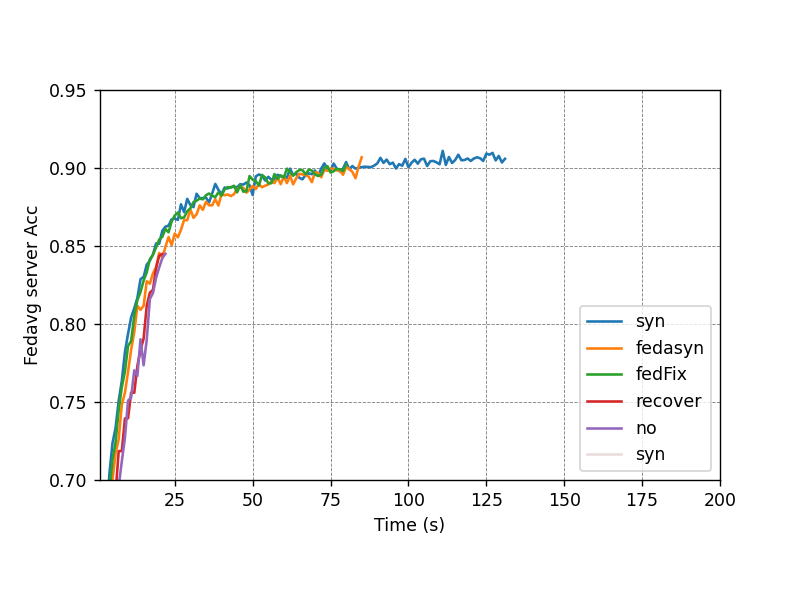

132 132
86 86
81 81
22 22
23 23
183 183


In [473]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
#         acc = load_acc(exp_name)
#         acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        avg_acc = load_acc(exp_name)
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        
        
        time = load_time(exp_name)

        print(len(time),len(avg_acc))
        
#         if i in [7,8,9,10,13,14,15,16,]:
        avg_acc = load_fed_avg_acc(exp_name)
        
        plt.plot(avg_acc, label=exp_legend[i])
#         else:
#             plt.plot(time, avg_acc, linewidth=1, label=exp_legend[i])
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Time (s)")
plt.ylabel("Fedavg server Acc")

plt.xlim([1,200])
plt.ylim([0.70,0.95])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()

result_path = join("results", config.EXP_NAME)
if not os.path.isdir(f"results/{config.EXP_NAME}/figs"):
    os.makedirs(f"results/{config.EXP_NAME}/figs")
fig_path = join(result_path, "figs")
plt.savefig(join(fig_path, "FR-FL".format("_cs" if client_sel else "")), dpi=300)

In [456]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        if i in [0,1,2,3,4,5,6,7]: continue
#         acc = load_acc(exp_name)
#         acc = np.convolve(acc, np.ones((n,)) / n, mode='valid')
        
#         avg_acc = np.convolve(avg_acc, np.ones((n,)) / n, mode='valid')
        
        
        client_acc = load_client_acc(exp_name)
        
        time = load_client_time(exp_name)
        
        print(len(client_acc),len(time))


        for col in range(0,10,4):
            plt.plot(time[col], client_acc[col], linewidth=1, label='col'+exp_legend[i])
        
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")
plt.xlabel(r"Round (s)")
plt.ylabel("Fedavg server Acc")

plt.xlim([1,40000])
plt.ylim([0.70,0.98])

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


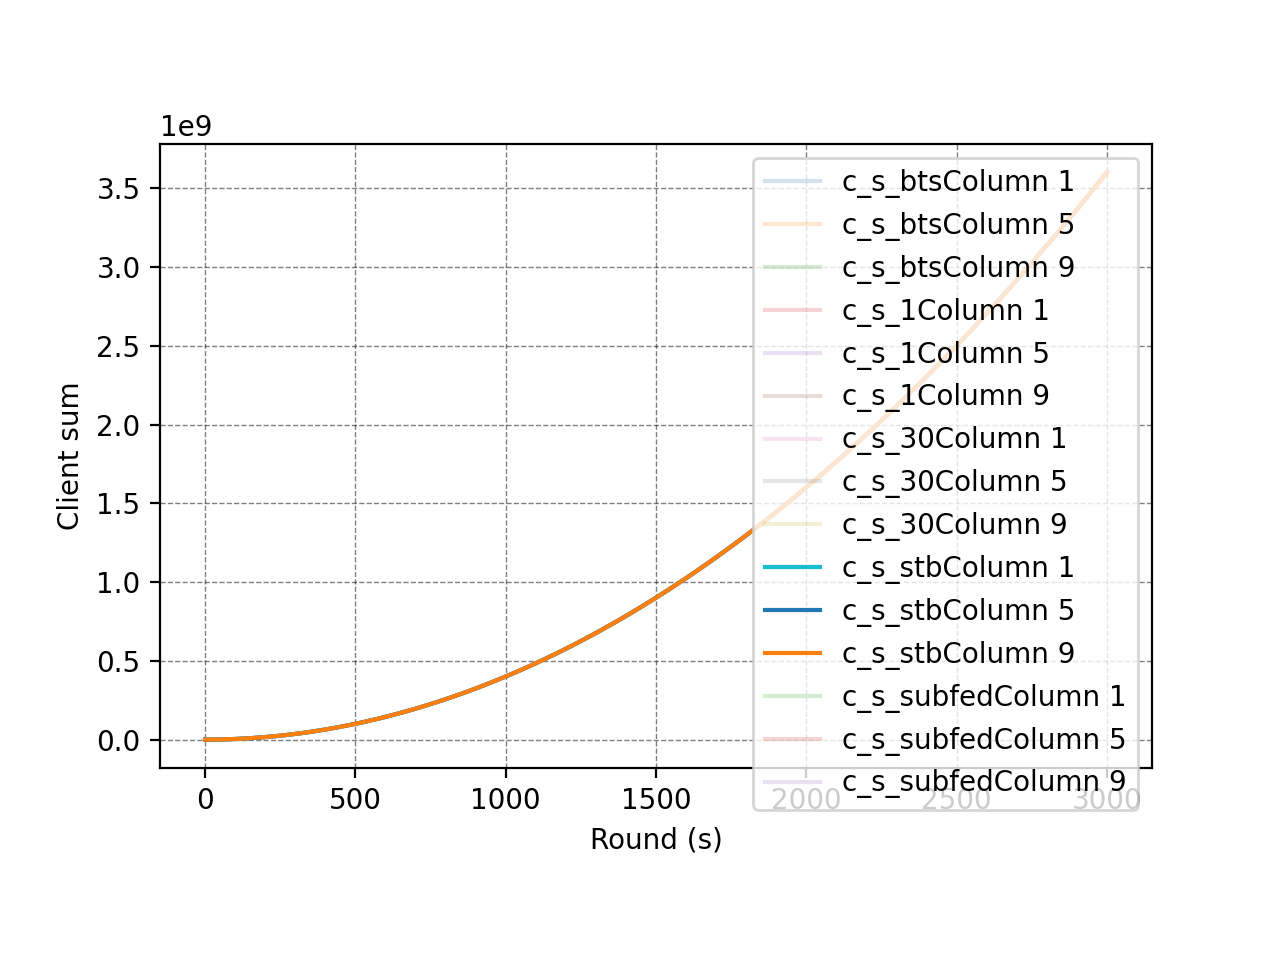

Skipping training results for CelebA, Hetero_FL——[Hetero_fair_cuda20000_second]_[1, 0.5, 0.1]un_fair_1_10_un_increase_-1_sub_fed_avg_g_0_0_n_False. Client selection = False.
Skipping training results for CelebA, 1. Client selection = False.


In [60]:
plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        client_sum = load_model_sum(exp_name)
        client_sum = [[s.cpu().numpy() for s in cs] for cs in client_sum]

        client_acc = np.array(client_sum) 

        for col in range(0,10,4):
            plt.plot(client_acc[:, col], label='c_s_'+str(exp_legend[i])+f'Column {col+1}')
    
    
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Client sum")

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>


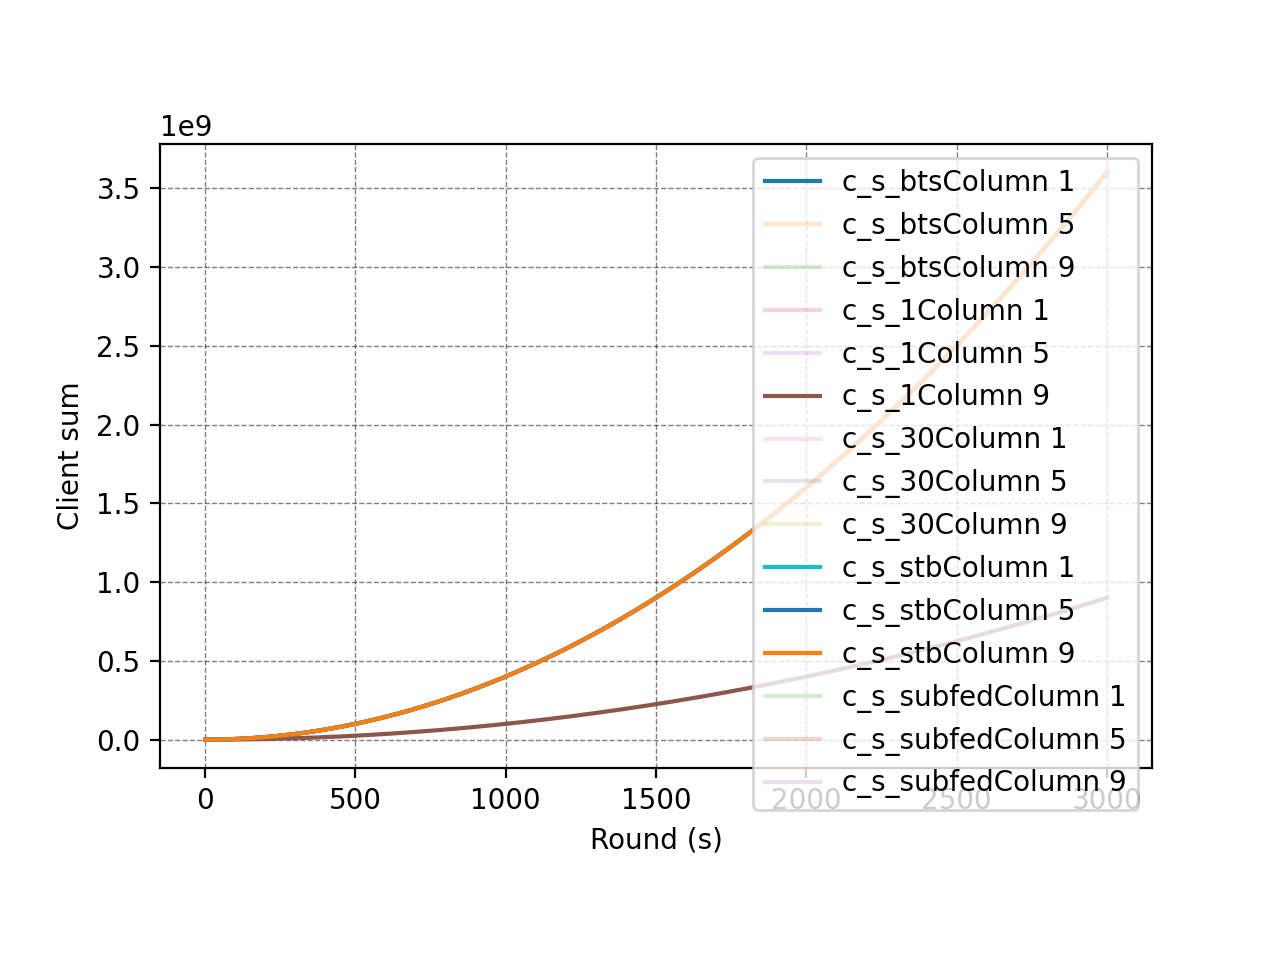

Skipping training results for CelebA, Hetero_FL——[Hetero_fair_cuda20000_second]_[1, 0.5, 0.1]un_fair_1_10_un_increase_-1_sub_fed_avg_g_0_0_n_False. Client selection = False.
Skipping training results for CelebA, 1. Client selection = False.


In [61]:

plt.figure()

for i in range(len(exp)):
    exp_name = exp[i]
    try:
        client_sum = load_server_to_client_sum(exp_name)
        client_sum = [[s.cpu().numpy() for s in cs] for cs in client_sum]

        client_acc = np.array(client_sum) 

        for col in range(0,10,4):
            plt.plot(client_acc[:, col], label='c_s_'+str(exp_legend[i])+f'Column {col+1}')
    
    
    except FileNotFoundError:
        print(f"Skipping training results for {dataset_name}, {exp_name}. Client selection = {client_sel}.")

plt.xlabel(r"Round (s)")
plt.ylabel("Client sum")

plt.legend(exp_legend,frameon=False, loc="center right",fontsize='small',ncol=3)
        
        

# Get the current axes and legend
ax = plt.gca()
legend = ax.legend()


# Function to handle legend click event
def on_legend_click(event):
    legline = event.artist
    origline = legline._orig_artist
    vis = not origline.get_visible()
    origline.set_visible(vis)
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    plt.draw()


# Connect the event handler to the legend
for legline, origline in zip(legend.get_lines(), ax.lines):
    legline.set_picker(True)
    legline._orig_artist = origline
    origline.set_visible(False)
    legline.set_alpha(0.2)# Set all lines to be initially hidden

plt.gcf().canvas.mpl_connect('pick_event', on_legend_click)



# 调整子图之间的间距和图形的大小
plt.subplots_adjust(top=0.85, bottom=0.2)
 
# Show the plot
plt.grid(linestyle="--", color='black', lw='0.5', alpha=0.5)
plt.show()


In [46]:
import copy


class CliffWalkingEnv:
    """ 悬崖漫步环境"""
    def __init__(self, ncol=12, nrow=4):
        self.ncol = ncol  # 定义网格世界的列
        self.nrow = nrow  # 定义网格世界的行
        # 转移矩阵P[state][action] = [(p, next_state, reward, done)]包含下一个状态和奖励
        self.P = self.createP()

    def createP(self):
        # 初始化
        P = [[[] for j in range(4)] for i in range(self.nrow * self.ncol)]
        # 4种动作, change[0]:上,change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        for i in range(self.nrow):
            for j in range(self.ncol):
                for a in range(4):
                    # 位置在悬崖或者目标状态,因为无法继续交互,任何动作奖励都为0
                    if i == self.nrow - 1 and j > 0:
                        P[i * self.ncol + j][a] = [(1, i * self.ncol + j, 0,
                                                    True)]
                        continue
                    # 其他位置
                    next_x = min(self.ncol - 1, max(0, j + change[a][0]))
                    next_y = min(self.nrow - 1, max(0, i + change[a][1]))
                    next_state = next_y * self.ncol + next_x
                    reward = -1
                    done = False
                    # 下一个位置在悬崖或者终点
                    if next_y == self.nrow - 1 and next_x > 0:
                        done = True
                        if next_x != self.ncol - 1:  # 下一个位置在悬崖
                            reward = -100
                    P[i * self.ncol + j][a] = [(1, next_state, reward, done)]
        return P

In [48]:
env = CliffWalkingEnv()

In [49]:
env.P

[[[(1, 0, -1, False)],
  [(1, 12, -1, False)],
  [(1, 0, -1, False)],
  [(1, 1, -1, False)]],
 [[(1, 1, -1, False)],
  [(1, 13, -1, False)],
  [(1, 0, -1, False)],
  [(1, 2, -1, False)]],
 [[(1, 2, -1, False)],
  [(1, 14, -1, False)],
  [(1, 1, -1, False)],
  [(1, 3, -1, False)]],
 [[(1, 3, -1, False)],
  [(1, 15, -1, False)],
  [(1, 2, -1, False)],
  [(1, 4, -1, False)]],
 [[(1, 4, -1, False)],
  [(1, 16, -1, False)],
  [(1, 3, -1, False)],
  [(1, 5, -1, False)]],
 [[(1, 5, -1, False)],
  [(1, 17, -1, False)],
  [(1, 4, -1, False)],
  [(1, 6, -1, False)]],
 [[(1, 6, -1, False)],
  [(1, 18, -1, False)],
  [(1, 5, -1, False)],
  [(1, 7, -1, False)]],
 [[(1, 7, -1, False)],
  [(1, 19, -1, False)],
  [(1, 6, -1, False)],
  [(1, 8, -1, False)]],
 [[(1, 8, -1, False)],
  [(1, 20, -1, False)],
  [(1, 7, -1, False)],
  [(1, 9, -1, False)]],
 [[(1, 9, -1, False)],
  [(1, 21, -1, False)],
  [(1, 8, -1, False)],
  [(1, 10, -1, False)]],
 [[(1, 10, -1, False)],
  [(1, 22, -1, False)],
  [(1, 9, -